In [1]:
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%config Completer.use_jedi = False

In [3]:
house_data  = pd.read_csv("data/train.csv")
house_data.columns
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


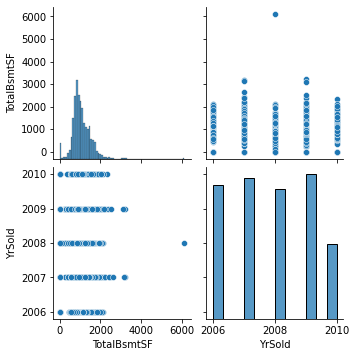

In [4]:
features = ["TotalBsmtSF", "YrSold"]
X = house_data[features]
y = house_data["SalePrice"]
sbn.pairplot(data = X)

<AxesSubplot:>

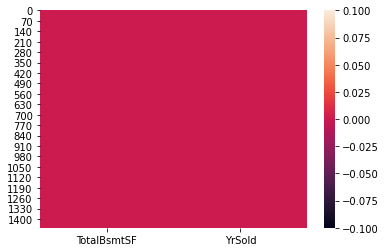

In [5]:
sbn.heatmap(X.isnull())

<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

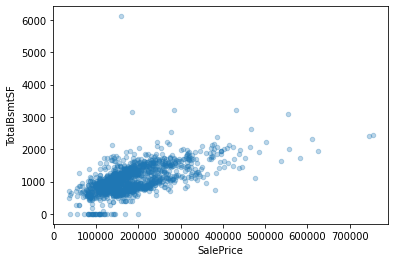

In [6]:
house_data.plot.scatter(x = "SalePrice", y = "TotalBsmtSF", alpha=0.3) 

In [7]:
house_data["TotalBsmtSF"].describe()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [8]:
y_test.isna().sum()

0

In [9]:
rg = linear_model.LinearRegression()

rg.fit(X_train, y_train)

LinearRegression()

In [10]:

predictions = rg.predict(X_test)
mean_squared_error(predictions, y_test)

rg.score(X_test, y_test)


0.3261592358071712

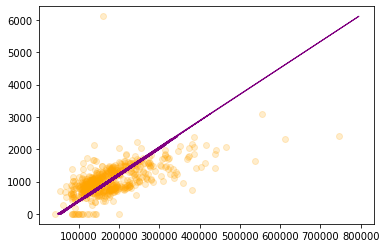

In [19]:
plt.plot(predictions, X_test["TotalBsmtSF"], color='purple', linewidth=1)
plt.scatter(y_test, X_test["TotalBsmtSF"], color="orange", alpha=0.2)
plt.show()